In [ ]:
import random
import torch
import random
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
# !pip install tensorflow

In [ ]:
#load data from kaggle

import kagglehub
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

# Load the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77/WELFake_Dataset.csv")

print("Dataset preview:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for missing values and drop them
df.dropna(subset=['text', 'label'], inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Dataset preview:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Dataset statistics:
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    1803

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

# Split the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

In [ ]:
df['label']

,label
0,1
1,1
2,1
3,0
4,1
...,...
72129,0
72130,1
72131,0
72132,0



Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94      7010
        True       0.94      0.95      0.95      7409

    accuracy                           0.95     14419
   macro avg       0.95      0.95      0.95     14419
weighted avg       0.95      0.95      0.95     14419



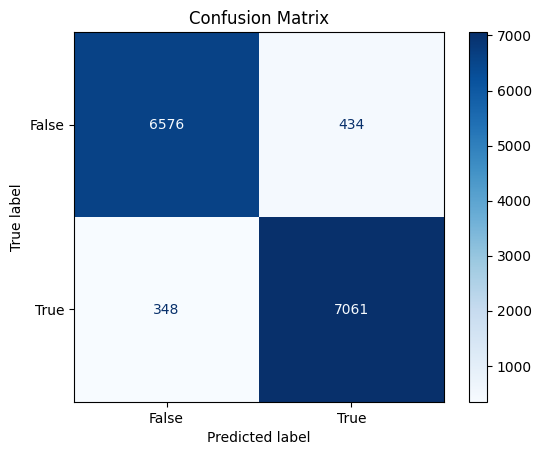


Sample Predictions:

Sample 1
Text: Trump s ongoing meltdown over  fake news  (the rest of us call it  reporting) organizations entered what seems like its eighteenth year on Wednesday after NBC correctly reported on the  Today  show that companies like Wal-Mart and General Motors are pulling a fast one on Trump by saying that job creation that was going to happen anyway was because of him in an effort to trick him into liking them.But don t take NBC s word for it.The CEOs of Fiat Chrysler and Ford said job announcements were business decisions and not a result of pressure from Trump https://t.co/lh8MhyoIAf  David Shepardson (@davidshepardson) January 18, 2017Nevertheless, Trump decried any reporting that does not place him as some kind of job creation wizard as  fake news,  the new right-wing term for  facts    in third person, nonetheless.Totally biased @NBCNews went out of its way to say that the big announcement from Ford, G.M., Lockheed & others that jobs are coming back  Donald 

In [ ]:
# Tfidf
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Model Training with Logistic Regression
model = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
model.fit(X_train, train_labels)

# Predict on the test set
predictions = model.predict(X_test)

accuracy = accuracy_score(test_labels, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(test_labels, predictions, target_names=['False', 'True']))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['False', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Display a few predictions
print("\nSample Predictions:")
for i, (text, pred, true_label) in enumerate(zip(test_texts[:5], predictions[:5], test_labels[:5])):
    print(f"\nSample {i+1}")
    print(f"Text: {text}")
    print(f"Predicted: {'True' if pred else 'False'}, Actual: {'True' if true_label else 'False'}")